# Certificate in Data Science | Assignment 6 |  
> University of Washington, Seattle, WA    
> December 2019  
> N. Hicks

## Problem Statement  
Cypress from New Ventures Department has found a banking client who wants to do a targeted marketing campaign for a specialty investment product to some of its customers. Cypress stresses that the bank only wants to spend the effort on customers who are likely to say yes; last year they used a different company to generate an algorithm and ended up spamming many of their customers with products they didn't want.

## Assignment Instructions  
Using the `Bank Data.csv` file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:
1. Read in, parse, and pre-process the data.
2. Perform a brief exploratory analysis.
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model.
4. Graph the structure of your decision tree, as well as the radnom forest decision tree.
5. Graph the confusion matrices for each of your models.

## Import Libraries

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from subprocess import check_call
from IPython.display import Image

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Establish the Datatset

### Global Variables

In [2]:
'''
Set the resultant plot parameters.
RETURN: none.
'''
%matplotlib inline

# set for all notebook; width, height of the resulting plots
plt.rcParams["figure.figsize"] = [10, 6.5]   # [width, height]

sns.set()

### Functions for Scripting

In [3]:
'''
Retrieve the prescribed dataset.
INPUT:  *.csv, *.data
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path + file, sep=',', header=0)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path, file), sep=',', header=0)
    
    return _df

In [4]:
'''
Tools for viewing a dataset
INPUT: pd.DataFrame
OUTPUT: print the results
'''
def print_data_attrs(_df):
    print('\nDATASET INFO\n{}'.format(_df.info()))          # gives the structure of the data (rows/cols)
    print('\nDATASET HEAD\n{}'.format(_df.head()))          # shows the top five data entries
    print('\nDATASET DESCRIBE\n{}'.format(_df.describe()))      # gives the statistics on the data in the DF

In [5]:
'''
Describe all unique attributes of all dataset features
INPUT: pd.DataFrame
RETURN: pd.Series; print unique values
'''
def get_unique_vals(_df):
    features_all = _df.columns
    print('THE UNIQUE VALUES OF ALL DATASET FEATURES')
    print('=========================================')
    for feature in features_all:
        val = _df[feature].unique()
        print('\n' + str(feature) + ' ({}):\n{}'.format(len(val), val))

In [6]:
'''
Create a scale function for a single feature.
INPUT: pd.Series; a single attribute.
RETURN: a scaled column attribute.
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
'''
Build a histogram plot of the primary features
INPUT: _df|DataFrame, col|the list
RETURN: seaborn.distplot
'''
def hist_plot(_df, col):
    sns.distplot(_df[col], bins=50, hist=True).set_title('HISTOGRAM OF SELECTED FEATURE')
    plt.show()

In [8]:
'''
Asses the dataset imbalance, of the target attribute
INPUT: pd.Series
RETURN: the count of the target attributes
'''
def count_vals(target):
    temp_count = target.value_counts()
    print('Original dataset size (0: {}, 1: {})'.format(temp_count[0], temp_count[1]))

In [9]:
'''
Accomplish a 'train-test-validate' split of a provided dataset.
INPUT: pd.DataFrame
RETURN: pd.DataFrame| [train, validate, test]
'''
    # np.split will split at 60% of the length of the shuffled array,
    # then 80% of length (which is an additional 20% of data),
    # thus leaving a remaining 20% of the data.
    # This is due to the definition of the function.
def train_test_validate_split(_df):
    train, validate, test = np.split(_df.sample(frac=1), [int(.6*len(_df)), int(.8*len(_df))])
    print('TRAIN:    {}\nVALIDATE: {}\nTEST:     {}'.format(train.shape, validate.shape, test.shape))
    return [train, validate, test]

In [10]:
'''
Generate an accuracy Score for a Decision Tree
INPUT: y_test|the test target, y_pred|the predicted scores
RETURN: prints the Accuracy Score
'''
def print_scores_decision_tree(y_test, y_pred):
    print("Accuracy: {}%".format(np.round(accuracy_score(y_test, y_pred)*100, 2)))

In [11]:
'''
Derive the accuracy score for the Random Forest Decision Tree,
Derive the accuracy score for the Gradient Descent Boost Decision Tree
RETURN: print of the accuracy score
'''
def print_scores_ensemble_tree(model, X, y):
    Y_hat = model.predict(X)
    Accuracy = [1 for i in range(len(Y_hat)) if y.iloc[i] == Y_hat[i]]
    Accuracy = round(float(np.sum(Accuracy))/len(Y_hat)*100,2)
    print('%.2f%%'%Accuracy)

In [12]:
'''
Create a visualization of a decision tree -- must install graphviz and pydot2 packages for this to work
INPUT: model|the decision tree model, labels|the column labels as type 'list'
RETURNS: image file of the decision tree
'''
def tree_visualize(model, labels, file_out):
    dotfile = open(file_out + '.dot', 'w')
    tree.export_graphviz(model, out_file=dotfile, feature_names=labels)
    dotfile.close()

    # Convert the dot file to a png -- optional method
    #import os
#     os.system("dot -Tpng dtree.dot -o dtree.png")

    # Convert the dot file to a png
    check_call(['dot','-Tpng', file_out + '.dot', '-o', file_out + '.png'])

In [13]:
'''
Establish an appropriately labeled confusion matrix  
INPUT: y_test|test target, y_pred| test prediction, pos|positivie outcome, neg|negative outcome
RETURN: pd.DataFrame
'''
def conf_matrix(y_test, y_pred, pos, neg):
    return pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        columns=['Predicted '+neg, 'Predicted '+pos],
        index=['True '+neg, 'True '+pos]
    )

### Import the Data

In [14]:
# import the sensors dataset
path = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/'   # check this repository first; else use current working directory
file = 'Bank Data.csv'
bank_df = fetch_data(path, file)

LOCAL FILE USED


### Wrangle the Data

In [15]:
# return the basic DataFrame perspectives
print_data_attrs(bank_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null object
children       600 non-null int64
car            600 non-null object
save_act       600 non-null object
current_act    600 non-null object
mortgage       600 non-null object
pep            600 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 51.7+ KB

DATASET INFO
None

DATASET HEAD
   age     sex      region   income married  children  car save_act  \
0   48  FEMALE  INNER_CITY  17546.0      NO         1   NO       NO   
1   40    MALE        TOWN  30085.1     YES         3  YES       NO   
2   51  FEMALE  INNER_CITY  16575.4     YES         0  YES      YES   
3   23  FEMALE        TOWN  20375.4     YES         3   NO       NO   
4   57  FEMALE       RURAL  50576.3     YES         0   NO  

In [16]:
# return the unique attribute values of the DataFrame
get_unique_vals(bank_df)

THE UNIQUE VALUES OF ALL DATASET FEATURES

age (50):
[48 40 51 23 57 22 58 37 54 66 52 44 36 38 46 62 31 61 50 27 56 45 39 20
 33 43 19 55 47 67 32 64 29 24 63 28 34 42 65 21 41 30 25 59 35 53 18 49
 26 60]

sex (2):
['FEMALE' 'MALE']

region (4):
['INNER_CITY' 'TOWN' 'RURAL' 'SUBURBAN']

income (599):
[17546.   30085.1  16575.4  20375.4  50576.3  37869.6   8877.07 24946.6
 25304.3  24212.1  59803.9  26658.8  15735.8  55204.7  19474.6  22342.1
 17729.8  41016.   26909.2  22522.8  57880.7  16497.3  38446.6  15538.8
 12640.3  41034.   20809.7  20114.   29359.1  24270.1  22942.9  16325.8
 23443.2  29921.3  37521.9  19868.   10953.   13381.   18504.3  25391.5
 26774.2  26952.6  55716.5  27571.5  13740.   52670.6  13283.9  13106.6
 39547.8  17867.3  14309.7  23894.8  16259.7  29794.1  56842.5  47835.8
 24977.5  23124.9  15143.8  25334.3  24763.3  36589.   27022.6  11700.4
  5014.21 17390.1  10861.   34892.9  19403.1  10441.9  14064.9   8062.73
 31982.   23197.5  52674.   35610.5  26948.   4

#### Encode the Dataset

In [17]:
# update the 'MALE' 'FEMALE' values to binary elements
bank_df['sex'] = bank_df['sex'].map({'FEMALE': 0, 'MALE': 1})

# update the attribute 'YES' 'NO' values to binary elements
attributes = ['married', 'car', 'save_act', 'current_act', 'mortgage', 'pep']
for attr in attributes:
    bank_df[attr] = bank_df[attr].map({'NO': 0, 'YES': 1})

# update the 'regions' attribute elements
attributes = ['region']
for attr in attributes:
    bank_df[attr] = bank_df[attr].map({'INNER_CITY': 0, 'TOWN': 1, 'RURAL': 2, 'SUBURBAN': 3})

#### Scale the Attributes

In [18]:
labels = ['age', 'income']
for label in labels:
    bank_df[label] = scale(bank_df[label])

## Exploratory Data Analysis

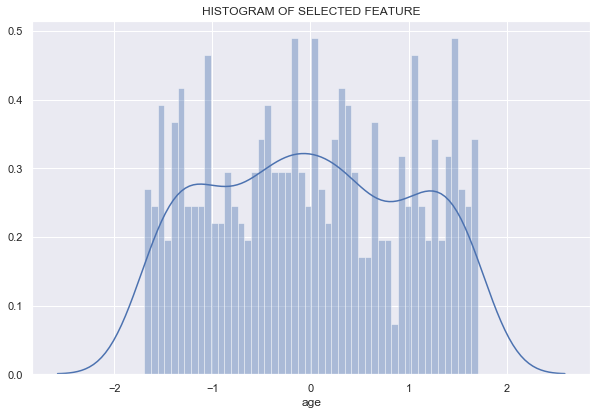

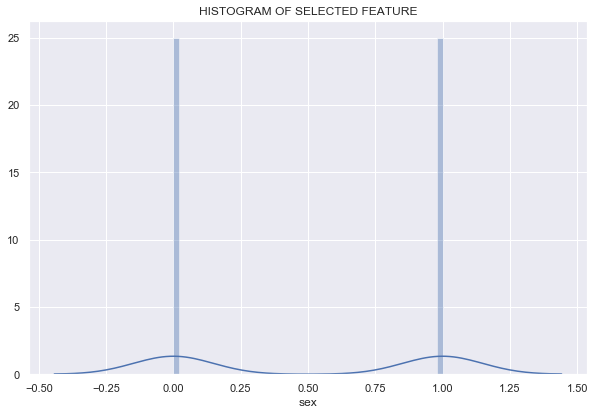

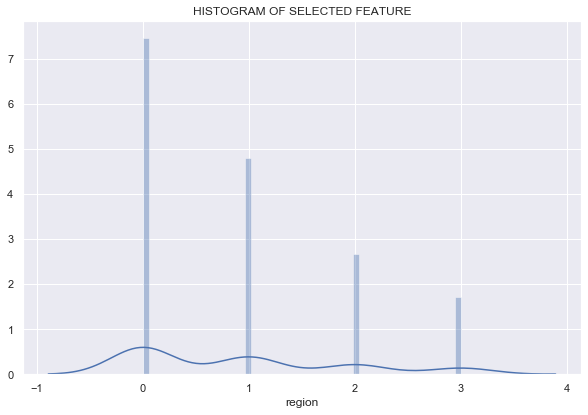

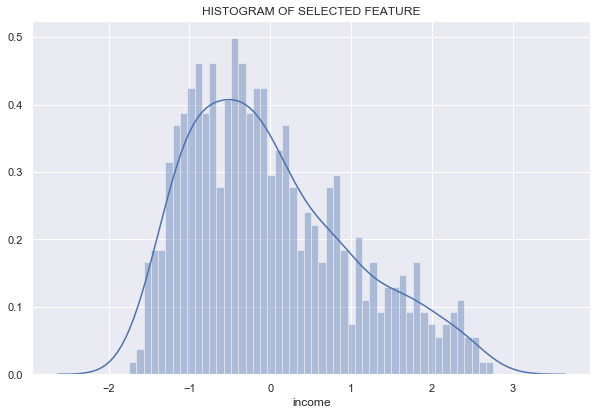

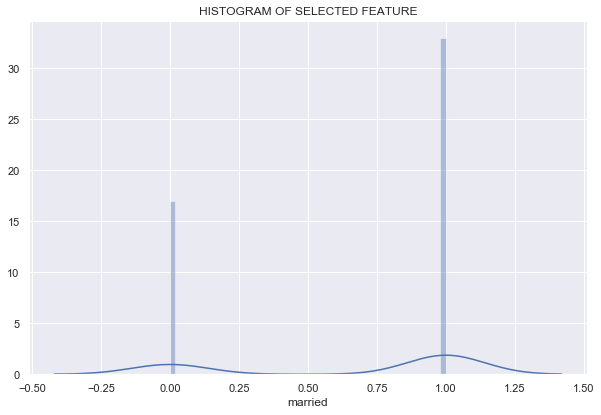

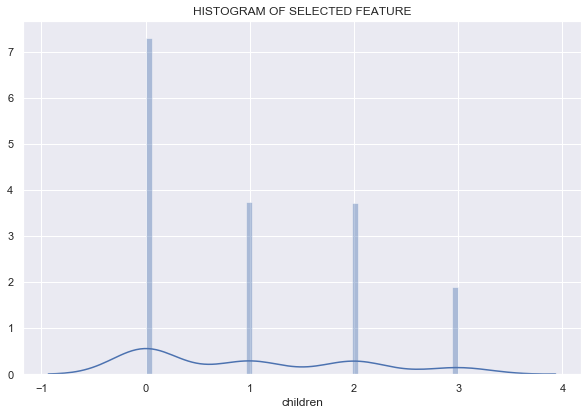

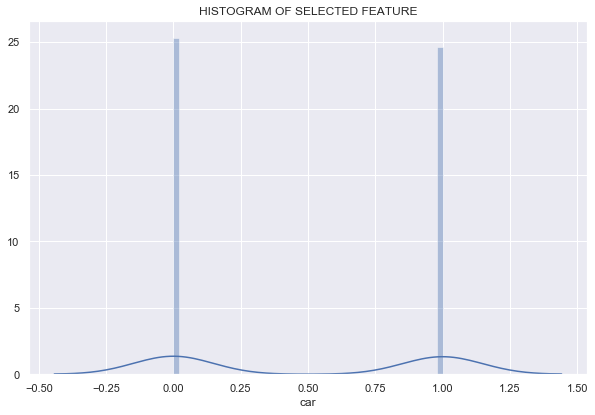

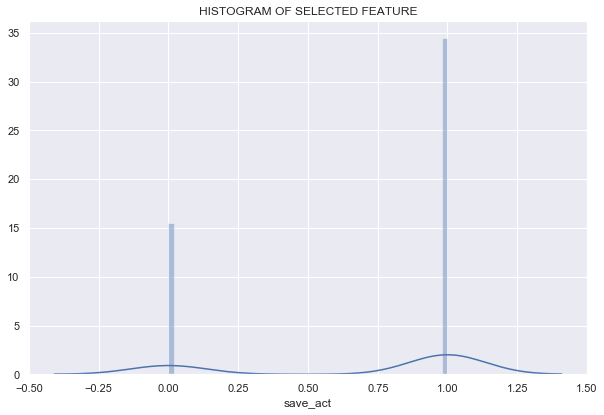

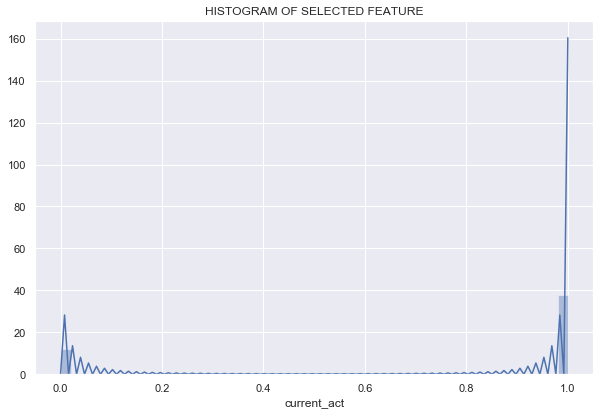

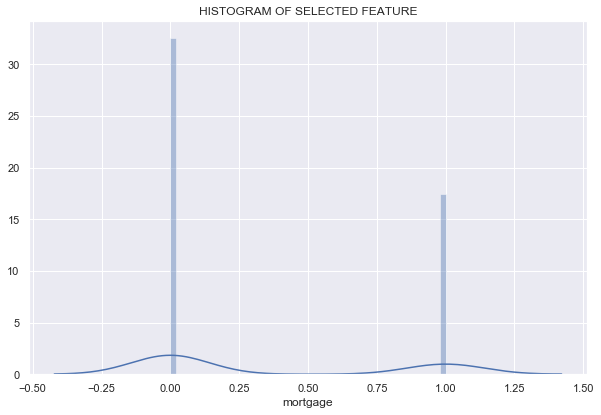

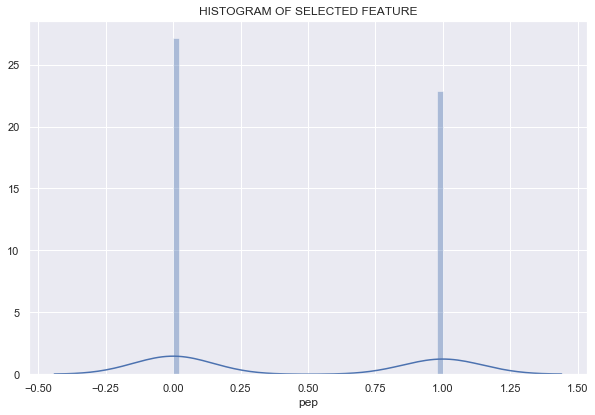

In [19]:
cols = bank_df.columns
for col in cols:
    hist_plot(bank_df, col)
# sns.distplot(bank_df[cols[0]], bins=50, hist=True).set_title('temp')

## Performance Evaluation of Trees

In [20]:
# establish the initial dataset split
split_data = train_test_validate_split(bank_df)   # [train, validate, test]

# re-assign the split results
train_data = split_data[0]
val_data = split_data[1]
test_data = split_data[2]

TRAIN:    (360, 11)
VALIDATE: (120, 11)
TEST:     (120, 11)


In [21]:
bank_df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,0.388887,0,0,-0.774168,0,1,0,0,0,0,1
1,-0.166170,1,1,0.198706,1,3,1,0,1,1,0
2,0.597034,0,0,-0.849474,1,0,1,1,1,0,0
3,-1.345667,0,1,-0.554643,1,3,0,0,1,0,0
4,1.013327,0,2,1.788562,1,0,0,1,0,0,0


In [22]:
# establish the specific attributes of the resultant splits, above
labels = list(train_data.columns)   # define the attribute labels
target = 'pep'     # the target attribute of the dataset
labels.remove(target)   # remove the target attribute from the label names

X_train = train_data[labels]
y_train = train_data[target]

X_test = test_data[labels]
y_test = test_data[target]

X_val = val_data[labels]
y_val = val_data[target]

In [23]:
# return the count of the target attributes; assess dataset imbalance
print('TRAIN DATASET')
count_vals(y_train)
print('\nTEST DATASET')
count_vals(y_test)
print('\nVALIDATION DATASET')
count_vals(y_val)

TRAIN DATASET
Original dataset size (0: 191, 1: 169)

TEST DATASET
Original dataset size (0: 66, 1: 54)

VALIDATION DATASET
Original dataset size (0: 69, 1: 51)


### Decision Tree

In [24]:
# return the basic entropy decision tree
print('ENTROPY\n=======')
model_entropy = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('TEST DATASET')
y_entropy_pred = model_entropy.predict(X_test)
print_scores_decision_tree(y_test, y_entropy_pred)

# use the validation dataset
print('\nVALIDATION DATASET')
y_entropy_pred = model_entropy.predict(X_val)
print_scores_decision_tree(y_val, y_entropy_pred)

ENTROPY
TEST DATASET
Accuracy: 87.5%

VALIDATION DATASET
Accuracy: 85.0%


In [25]:
# return the basic entropy decision tree
print('GINI\n=======')
model_gini = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)
print('TEST DATASET')
y_gini_pred = model_gini.predict(X_test)
print_scores_decision_tree(y_test, y_gini_pred)

# use the validation dataset
print('\nVALIDATION DATASET')
y_gini_pred = model_gini.predict(X_val)
print_scores_decision_tree(y_val, y_gini_pred)

GINI
TEST DATASET
Accuracy: 84.17%

VALIDATION DATASET
Accuracy: 82.5%


#### Confusion Matrix

In [26]:
terms = [target, 'non-'+target]

# the ENTROPY model
print('ENTROPY Confusion Matrix:')
print(conf_matrix(y_test, y_entropy_pred, terms[0], terms[1]))
# the GINI model
print('\n\nGINI Confusion Matrix:')
print(conf_matrix(y_test, y_gini_pred, terms[0], terms[1]))

ENTROPY Confusion Matrix:
              Predicted non-pep  Predicted pep
True non-pep                 38             28
True pep                     31             23


GINI Confusion Matrix:
              Predicted non-pep  Predicted pep
True non-pep                 34             32
True pep                     32             22


#### Graphical Tree

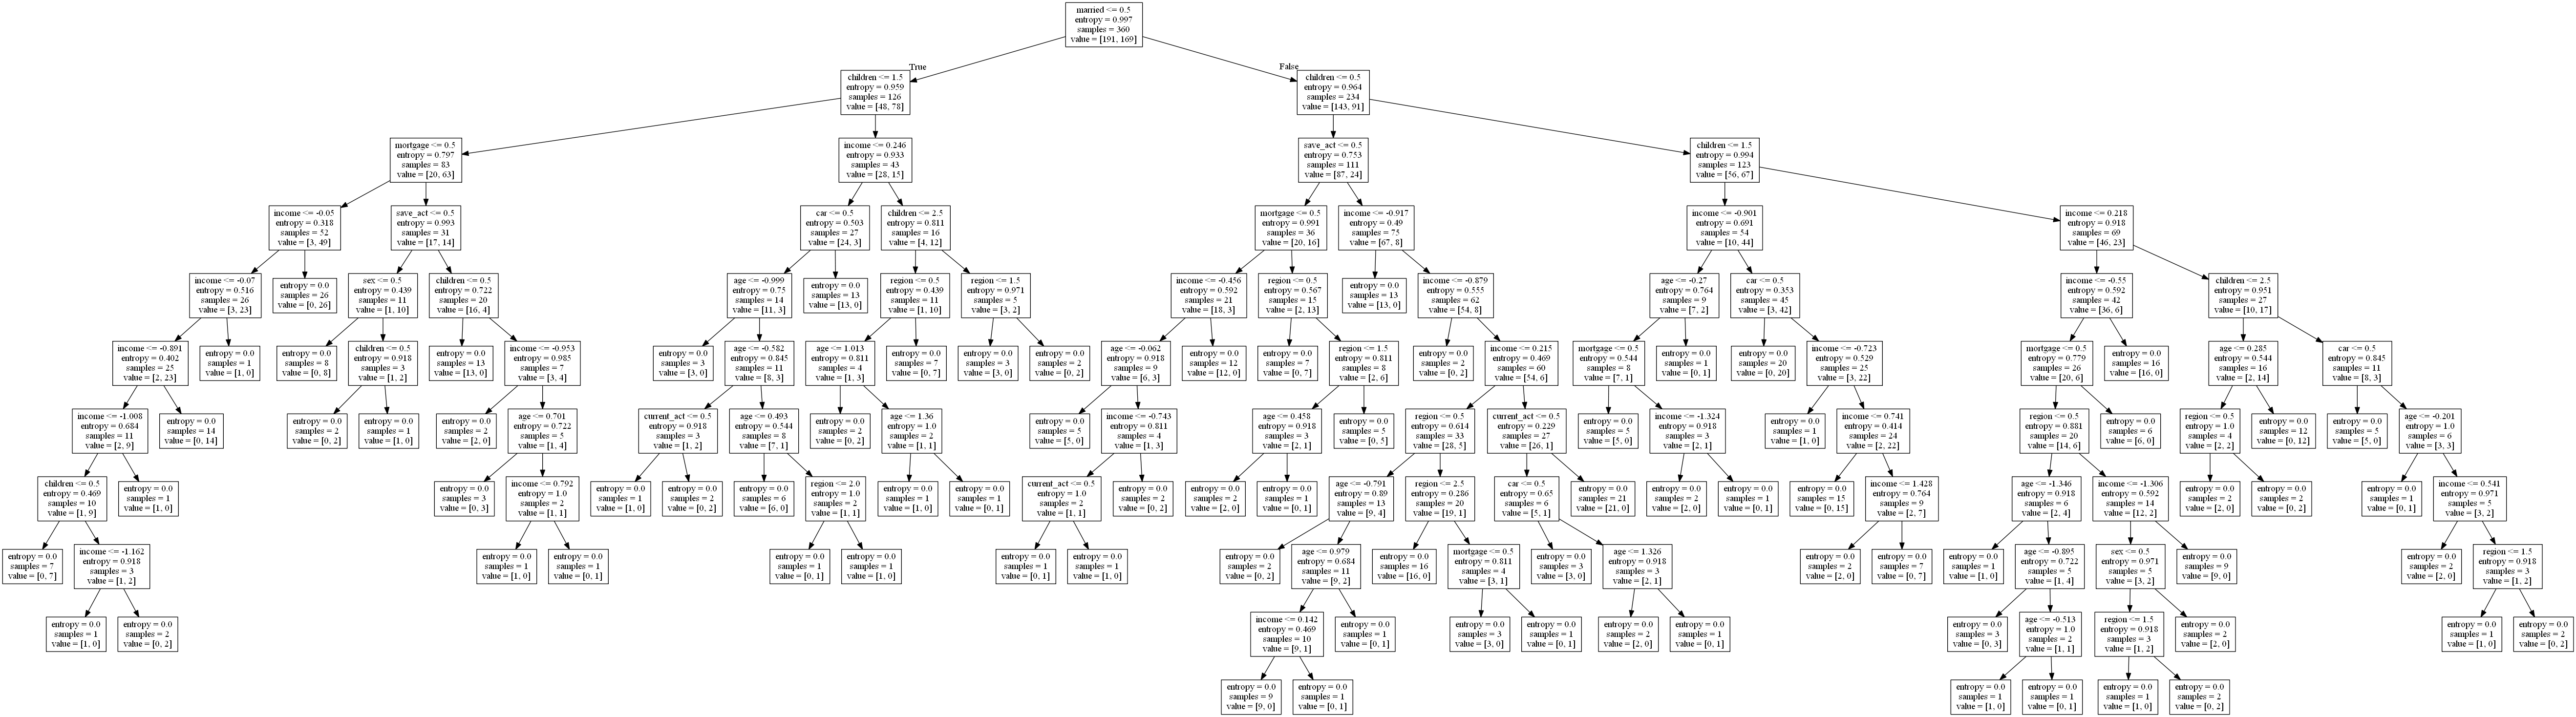

In [27]:
# establish the PNG image file type of the decision tree results
file_out = 'model_entropy'
tree_visualize(model_entropy, labels, file_out)
# display the image
Image(filename=file_out + '.png')

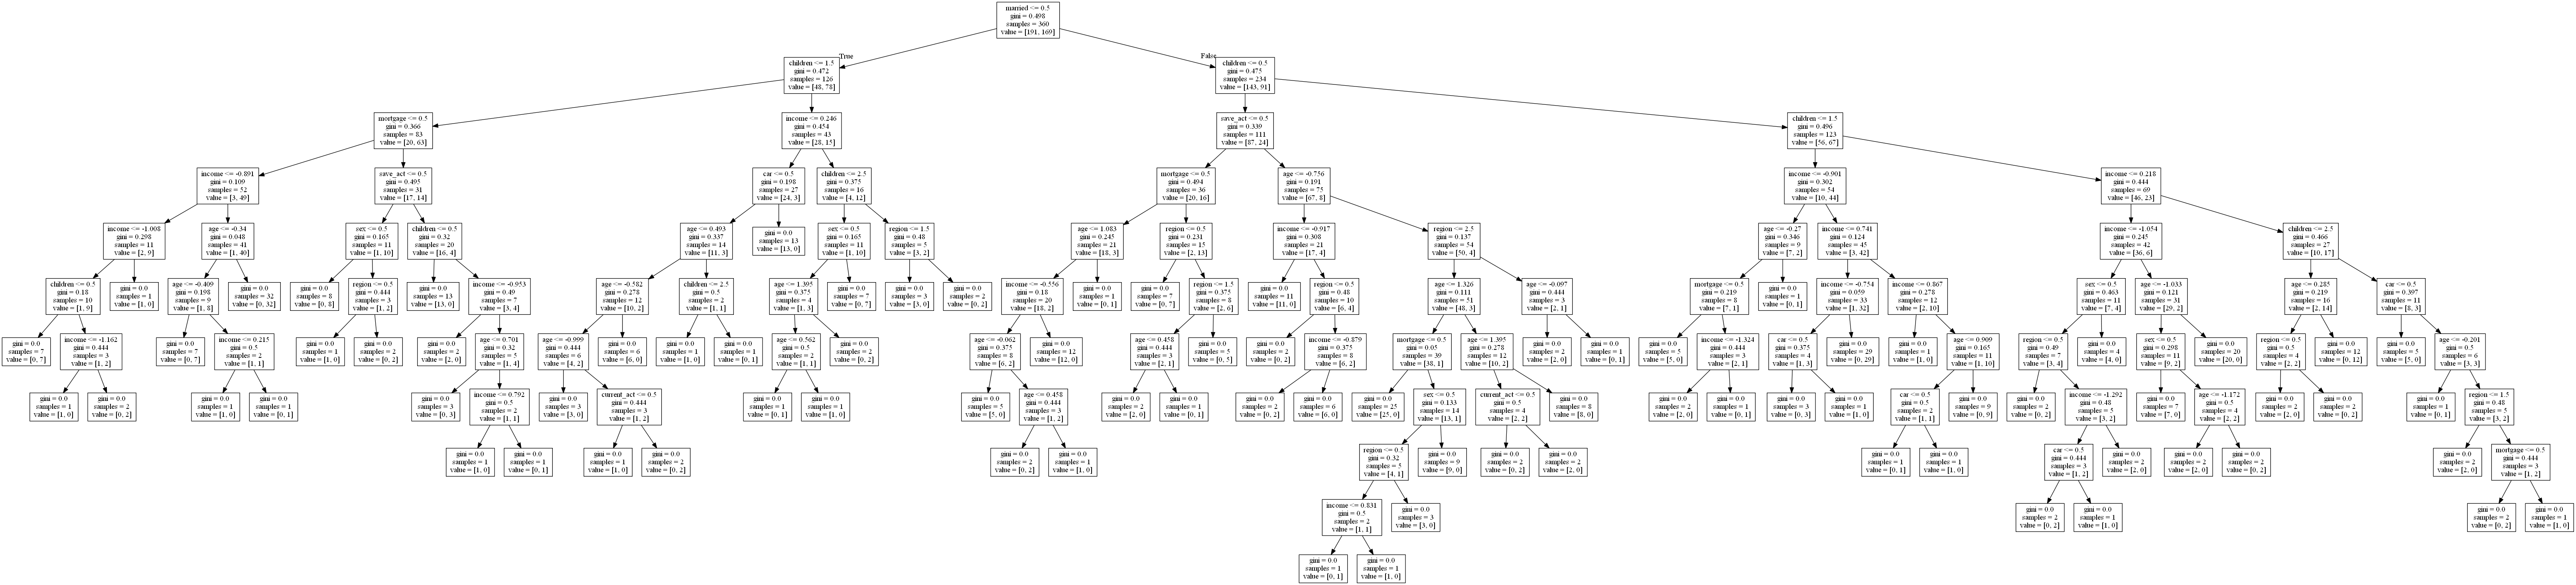

In [28]:
# establish the PNG image file type of the decision tree results
file_out = 'model_gini'
tree_visualize(model_gini, labels, file_out)
# display the image
Image(filename=file_out + '.png')

### Random Forest Decision Tree

In [29]:
# employ basic hyperparameters to the RANDOM FOREST model
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.11497176 0.01299857 0.04337092 0.26490283 0.13209323 0.2684932
 0.01400897 0.05501543 0.01372444 0.08042064]


In [30]:
# Return the Random Forest Decision Tree accuracy scores
print('RANDOM FOREST\n=============')
print('TEST DATASET')
print_scores_ensemble_tree(clf, X_test, y_test)

print('\nVALIDATION DATASET')
print_scores_ensemble_tree(clf, X_val, y_val)

RANDOM FOREST
TEST DATASET
90.00%

VALIDATION DATASET
89.17%


#### Confusion Matrix

In [31]:
# return the confusion matrix for the RANDOM FOREST model
terms = [target, 'non-'+target]

# the RADNOM FOREST model
y_random_pred = clf.predict(X_val)
print('RANDOM FOREST Confusion Matrix:')
print(conf_matrix(y_val, y_random_pred, terms[0], terms[1]))

RANDOM FOREST Confusion Matrix:
              Predicted non-pep  Predicted pep
True non-pep                 64              5
True pep                      8             43


#### Graphical Tree

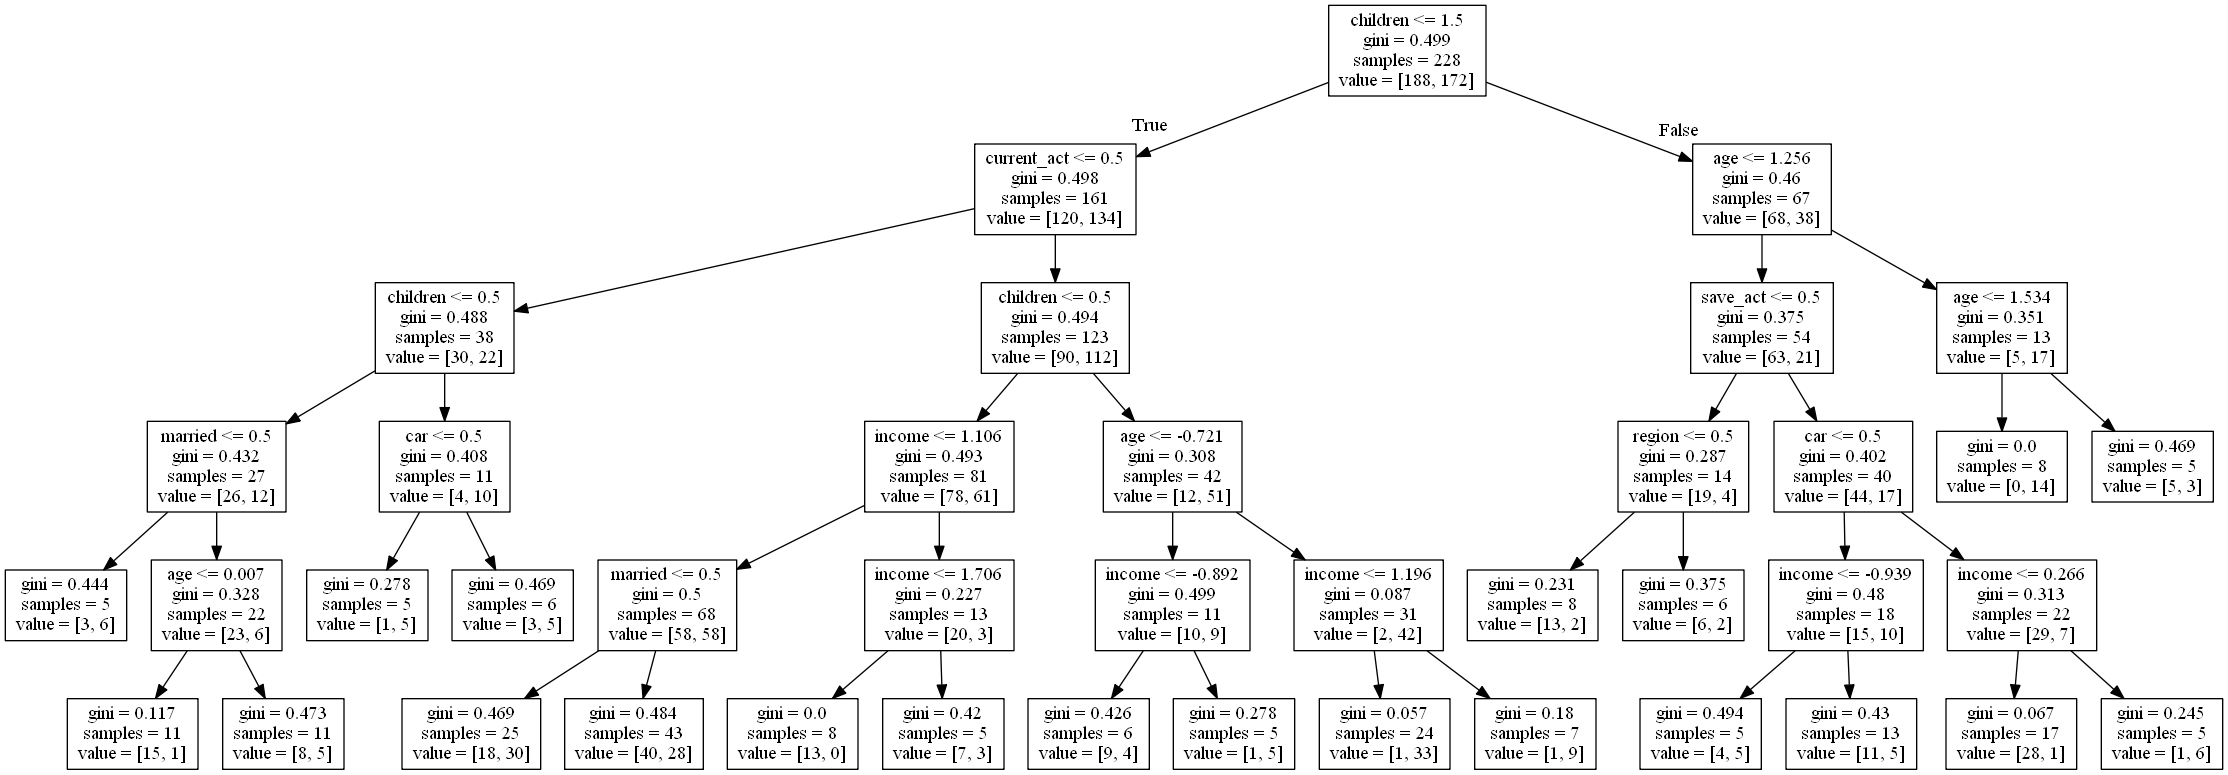

In [32]:
# establish the PNG image file type of the decision tree results
file_out = 'model_random'
# Extract a single tree to visualize
estimator = clf.estimators_[99]   # the final random forest decision tree
tree_visualize(estimator, labels, file_out)
# display the image
Image(filename=file_out + '.png')

### Gradient Descent Boost Decision Tree

In [33]:
# employ basic hyperparameters to the GRADIENT DESCENT model
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05

gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                    min_samples_leaf=min_node_size)
gbm_clf.fit(X_train, y_train)
print(gbm_clf.feature_importances_)

[0.08340028 0.00364947 0.02249623 0.28787284 0.07646028 0.29579259
 0.01284694 0.08972632 0.00681292 0.12094213]


In [34]:
# Return the Random Forest Decision Tree accuracy scores
print('GRADIENT BOOST\n=============')
print('TEST DATASET')
print_scores_ensemble_tree(gbm_clf, X_test, y_test)

print('\nVALIDATION DATASET')
print_scores_ensemble_tree(gbm_clf, X_val, y_val)

GRADIENT BOOST
TEST DATASET
91.67%

VALIDATION DATASET
90.00%


#### Confusion Matrix

In [35]:
# return the confusion matrix for the RANDOM FOREST model
terms = [target, 'non-'+target]

# the GRADIENT DESCENT BOOST model
y_gradDescent_pred = gbm_clf.predict(X_val)
print('GRADIENT DESCENT BOOST Confusion Matrix:')
print(conf_matrix(y_val, y_gradDescent_pred, terms[0], terms[1]))

GRADIENT DESCENT BOOST Confusion Matrix:
              Predicted non-pep  Predicted pep
True non-pep                 63              6
True pep                      6             45


## Results

- The imported dataset `Bank Data.csv` is assessed against the `pep` (Publically Exposed Person) attribute, as this value returned the highest accuracy result of all non-consecutive attributes therein.

- Performance accuracies were derived for the specific decision tree models, as follows:
      - Decision Tree, entropy: 79.17%
      - Decision Tree, gini:    81.67%
      - Random Forest:          89.17%
      - Gradient Descent Boost: 90.00%
      
- Graphical results are given for all decision trees, except the Gradient Decent Boost, that is in fact beyond the scope of this assignment.

- Confusion matrices are given for each of the decision trees as well.